In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression

In [156]:
train = 'dataset.csv'

test = 'validation_set.csv'

In [157]:
df = pd.read_csv(train, index_col=0)

In [158]:
df.head(), df.shape

(   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
 0     200000    2          3         1   30      2      2      2      2   
 1     200000    2          4         2   27     -2     -2     -2     -2   
 2      20000    2          2         2   28      0      0      2      0   
 3      50000    1          2         2   23      0      0      0     -1   
 4      20000    1          2         1   47     -1     -1     -1     -2   
 
    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
 0      2  ...     147273     149244     151973      6600      6000      5860   
 1     -2  ...          0          0          0         0         0         0   
 2      0  ...       8168       6894      11424      3353         3      5101   
 3      0  ...      48437      18712      19129      4175     41000     51705   
 4     -2  ...          0          0          0       780         0         0   
 
    PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next

In [159]:
df['default payment next month']

0        0
1        0
2        1
3        0
4        0
        ..
22495    0
22496    0
22497    0
22498    0
22499    0
Name: default payment next month, Length: 22500, dtype: int64

In [160]:
x = df.drop('default payment next month', axis=1)
y = df['default payment next month']

In [161]:
y.value_counts()

0    17523
1     4977
Name: default payment next month, dtype: int64

## Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

* SEX: Gender (1 = male; 2 = female).

* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

* AGE: Age (year).

* PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
    * PAY_0 = the repayment status in September, 2005;
    * PAY_1 = the repayment status in August, 2005;
    * . . . ;
    * PAY_6 = the repayment status in April, 2005.
        * The measurement scale for the repayment status is:
            * -1 = pay duly;
            * 1 = payment delay for one month;
            * 2 = payment delay for two months;
            * . . . ;
            * 8 = payment delay for eight months;
            * 9 = payment delay for nine months and above.

* BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar).
    * BILL_AMT1 = amount of bill statement in September, 2005;
    * BILL_AMT2 = amount of bill statement in August, 2005;
    * . . . ;
    * BILL_AMT6 = amount of bill statement in April, 2005.

* PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar).
    * PAY_AMT1 = amount paid in September, 2005;
    * PAY_AMT1 = amount paid in August, 2005;
    * . . . ;
    * PAY_AMT6 = amount paid in April, 2005.

In [162]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,200000,2,3,1,30,2,2,2,2,2,...,145374,147273,149244,151973,6600,6000,5860,6000,5000,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,4144,8168,6894,11424,3353,3,5101,6,6530,8103
3,50000,1,2,2,23,0,0,0,-1,0,...,49724,48437,18712,19129,4175,41000,51705,700,718,700
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,0,780,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,50000,2,2,1,50,0,0,0,0,0,...,20691,17081,16234,16330,2000,1306,1206,1000,697,532
22496,80000,2,2,1,53,0,0,0,0,0,...,20475,20325,20276,20662,2530,3990,850,800,1100,1100
22497,50000,2,2,1,50,0,0,0,0,0,...,48999,49388,48853,47765,2070,2357,1746,1628,1520,2202
22498,220000,1,2,1,32,0,0,0,0,0,...,105226,107476,109746,111920,3746,3820,4000,4000,4000,4500


In [163]:
#replace all 0,5,6 with 4(others) on EDUCATION column
x['EDUCATION'] = x['EDUCATION'].replace({5:4, 0:4, 6:4})

In [164]:
x['EDUCATION'].value_counts()

2    10546
1     7921
3     3690
4      343
Name: EDUCATION, dtype: int64

In [165]:
#replace all 0 with 3(others) on MARRIAGE column
x['MARRIAGE'] = x['MARRIAGE'].replace({0:3})

In [166]:
x['MARRIAGE'].value_counts()

2    11942
1    10281
3      277
Name: MARRIAGE, dtype: int64

In [167]:
##make female 0
x['SEX'] = x['SEX'].replace({2:0})

In [168]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [169]:
#mapping the data, 1 for danger late level and 0 for still okay level

x['PAY_0'] = np.where(x['PAY_0'].values > 2, 1,0)
x['PAY_2'] = np.where(x['PAY_2'].values > 2, 1,0)
x['PAY_3'] = np.where(x['PAY_3'].values > 2, 1,0)
x['PAY_4'] = np.where(x['PAY_4'].values > 2, 1,0)
x['PAY_5'] = np.where(x['PAY_5'].values > 2, 1,0)
x['PAY_6'] = np.where(x['PAY_6'].values > 2, 1,0)

In [170]:
x['PAY_6'].value_counts().sort_values()

1      233
0    22267
Name: PAY_6, dtype: int64

In [171]:
x[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
22495,0,0,0,0,0,0
22496,0,0,0,0,0,0
22497,0,0,0,0,0,0
22498,0,0,0,0,0,0


In [172]:
#amt_late represents the amount of times you were in the danger late level across the months
x['amt_late'] = x['PAY_0'] + x['PAY_2'] + x['PAY_3'] + x['PAY_4'] + x['PAY_5'] + x['PAY_6']

In [173]:
x['FULL_1'] = x['BILL_AMT1'] - x['PAY_AMT1']
x['FULL_2'] = x['BILL_AMT2'] - x['PAY_AMT2']
x['FULL_3'] = x['BILL_AMT3'] - x['PAY_AMT3']
x['FULL_4'] = x['BILL_AMT4'] - x['PAY_AMT4']
x['FULL_5'] = x['BILL_AMT5'] - x['PAY_AMT5']
x['FULL_6'] = x['BILL_AMT6'] - x['PAY_AMT6']

In [174]:
x[['FULL_1','FULL_2','FULL_3','FULL_4','FULL_5','FULL_6',]]

,FULL_1,FULL_2,FULL_3,FULL_4,FULL_5,FULL_6
0,133727,137137,139514,141273,144244,151973
1,0,0,0,0,0,0
2,-416,5693,-957,8162,364,3321
3,47099,9474,-1981,47737,17994,18429
4,-390,780,0,0,0,0
...,...,...,...,...,...,...
22495,19956,19133,19485,16081,15537,15798
22496,46158,97888,19625,19525,19176,19562
22497,49142,48301,47253,47760,47333,45563
22498,198264,99304,101226,103476,105746,107420


In [175]:
#mapping the data, 1 for not paid in full  and 0 for paid in full or more

x['FULL_1'] = np.where(x['FULL_1'].values > 0, 1,0)
x['FULL_2'] = np.where(x['FULL_2'].values > 0, 1,0)
x['FULL_3'] = np.where(x['FULL_3'].values > 0, 1,0)
x['FULL_4'] = np.where(x['FULL_4'].values > 0, 1,0)
x['FULL_5'] = np.where(x['FULL_5'].values > 0, 1,0)
x['FULL_6'] = np.where(x['FULL_6'].values > 0, 1,0)

In [176]:
x[['FULL_1','FULL_2','FULL_3','FULL_4','FULL_5','FULL_6',]]

,FULL_1,FULL_2,FULL_3,FULL_4,FULL_5,FULL_6
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,1,0,1,1,1
3,1,1,0,1,1,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
22495,1,1,1,1,1,1
22496,1,1,1,1,1,1
22497,1,1,1,1,1,1
22498,1,1,1,1,1,1


In [177]:
x['PEND'] = x['FULL_1'] + x['FULL_2'] + x['FULL_3'] + x['FULL_4'] + x['FULL_5'] + x['FULL_6']

In [178]:
continuous = ['LIMIT_BAL', 'AGE', 'amt_late', 'PEND']
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

In [179]:
#dummies for categoricals
edu_dummies = pd.get_dummies(x['EDUCATION'], prefix='edu', drop_first=True)
mar_dummies = pd.get_dummies(x['MARRIAGE'], prefix='mar', drop_first=True)

In [180]:
x_cat = pd.concat([x[['SEX']], edu_dummies, mar_dummies], axis=1)

In [181]:
x_cont = x[continuous]

In [182]:
from sklearn.preprocessing import StandardScaler

# Scale the cont train data
ss = StandardScaler()
x_cont = ss.fit_transform(x_cont)
x_cont = pd.DataFrame(x_cont)
x_cont.columns = continuous

In [183]:
X_train_all = pd.concat([x_cont, x_cat], axis=1)

Model time!!!

In [184]:
X = X_train_all

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

In [201]:
# Instantiate LogisticRegression
logreg = LogisticRegression(penalty='l1', fit_intercept=False, C=1e12, solver='saga', class_weight='balanced')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [203]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.2960592369477912
Testing Precision:  0.29073724007561436



Training Recall:  0.6329487523477327
Testing Recall:  0.6152



Training Accuracy:  0.5865481481481482
Testing Accuracy:  0.5809777777777778



Training F1-Score:  0.403420265070543
Testing F1-Score:  0.39486521181001283


In [204]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2499 1876]
 [ 481  769]]


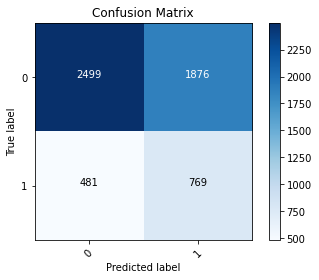

In [205]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=200)

In [192]:
#fit the model to the training data
rfc.fit(X_train, y_train)

#use the fitted model to predict on the test data
rfc_pred = rfc.predict(X_test)
rfc_predA = rfc.predict(X_train)

print('Training Precision: ', precision_score(y_train, rfc_predA))
print('Testing Precision: ', precision_score(y_test, rfc_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, rfc_predA))
print('Testing Recall: ', recall_score(y_test, rfc_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, rfc_predA))
print('Testing Accuracy: ', accuracy_score(y_test, rfc_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, rfc_predA))
print('Testing F1-Score: ', f1_score(y_test, rfc_pred))

Training Precision:  0.9160122908842608
Testing Precision:  0.3801089918256131



Training Recall:  0.7198819425811644
Testing Recall:  0.2232



Training Accuracy:  0.9235555555555556
Testing Accuracy:  0.7464888888888889



Training F1-Score:  0.8061899038461539
Testing F1-Score:  0.28125


In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [198]:

#use the fitted model to predict on the test data
knn_p = knn.predict(X_test)
knn_t = knn.predict(X_train)

print('Training Precision: ', precision_score(y_train, knn_t))
print('Testing Precision: ', precision_score(y_test, knn_p))
print('\n\n')

print('Training Recall: ', recall_score(y_train, knn_t))
print('Testing Recall: ', recall_score(y_test, knn_p))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, knn_t))
print('Testing Accuracy: ', accuracy_score(y_test, knn_p))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, knn_t))
print('Testing F1-Score: ', f1_score(y_test, knn_p))

Training Precision:  0.6445714285714286
Testing Precision:  0.5520504731861199



Training Recall:  0.15132814596189964
Testing Recall:  0.14



Training Accuracy:  0.7941333333333334
Testing Accuracy:  0.7836444444444445



Training F1-Score:  0.24511082138200782
Testing F1-Score:  0.22335673261008296
